In [1]:
import numpy as np
import scipy.io
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import butter, sosfilt, sosfreqz
from scipy.signal import welch
from scipy import signal
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
save_path = 'D:\EECE499\Features\GSRFeatures_FixedWindow.xlsx'
#save_path = '..\..\..\GSRFeatures_FixedWindow.xlsx'

In [4]:
sample_rate = 128

In [5]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=6):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [6]:
max_length = 17215

In [7]:
yup = np.array(list(range(1, 17216)))

In [8]:
yup

array([    1,     2,     3, ..., 17213, 17214, 17215])

In [9]:
17216/2460

6.998373983739837

In [10]:
window = 2460
x = [2460, 4920, 7380, 9840, 12300, 14760]
y = [1230, '-', 3690, '-', 7380, '-', 9840, '-', 12300]

In [11]:
window_intervals_even = np.array([1, 2, 3, 4, 5, 6])*window #7
window_intervals_odd = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])*window #6

In [12]:
window_intervals_even

array([ 2460,  4920,  7380,  9840, 12300, 14760])

In [13]:
window_intervals_odd = window_intervals_odd.astype(int)
window_intervals_odd

array([ 1230,  3690,  6150,  8610, 11070, 13530, 15990])

In [14]:
for i in range(1, 6):
    print(yup[window_intervals_even[i - 1]:window_intervals_even[i]].shape[0] == 2460)
    
for i in range(1, 7):
    print(yup[window_intervals_odd[i - 1]:window_intervals_odd[i]].shape[0] == 2460)

True
True
True
True
True
True
True
True
True
True
True


User ID: 3
Clip ID: 1
SHORT


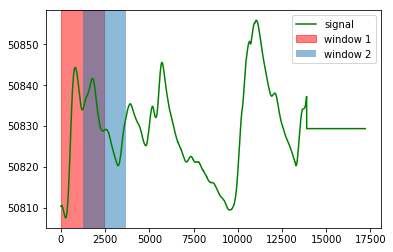

In [54]:
data_frames = []

for user_id in range(3, 4): #(1, 59)
    print('User ID: ' + str(user_id))
    
    mean_skin_resistance = [[] for i in range(13)]
    mean_first_derivative_res = [[] for i in range(13)]
    mean_abs_first_derivative_res = [[] for i in range(13)]
    mean_neg_first_derivative_res = [[] for i in range(13)]
    percentage_neg_first_derivative_res = [[] for i in range(13)]
    std_skin_resistance = [[] for i in range(13)]
    avg_minima_con = [[] for i in range(13)]
    #avg_rising_time_res =[]
    #log_power_density = []
    std_skin_conductance = [[] for i in range(13)]
    mean_first_derivative_con = [[] for i in range(13)]
    mean_abs_first_derivative_con = [[] for i in range(13)]
    mean_abs_second_derivative_con = [[] for i in range(13)]
    avg_minima_res = [[] for i in range(13)]
    #log_power_density
    psd_subband_01 = []
    psd_subband_02 = []
    psd_subband_03 = []
    psd_subband_04 = []
    zero_crossing_con_slow = [[] for i in range(13)]
    zero_crossing_con_very_slow = [[] for i in range(13)]
    psd_subband_11 = []
    psd_subband_12 = []
    psd_subband_13 = []
    psd_subband_14 = []
    psd_subband_15 = []
    psd_subband_16 = []
    psd_subband_17 = []
    psd_subband_18 = []
    psd_subband_19 = []
    psd_subband_10 = []
    
    presentation_id = []
    
    for clip_id in range(1, 2): #(1, 37)
        print('Clip ID: ' + str(clip_id))
        
        #data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'    
        data_path = './../../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
        
        presentation_id.append(str(user_id).zfill(2) + str(clip_id).zfill(2))
        
        if os.path.isfile(data_path):
            
            signal = scipy.io.loadmat(data_path)
            resistance = signal['Data_GSR'][:,4]
            time_stamp = signal['Data_GSR'][:,0]
            
            resistance = np.array(resistance)
            resistance = savgol_filter(resistance, 501, 3)
            conductance = 1 / resistance
            
            if (max_length > resistance.shape[0]):
                print("SHORT")
                resistance = np.pad(resistance, (0, max_length - resistance.shape[0]), 'mean')
                conductance = np.pad(conductance, (0, max_length - conductance.shape[0]), 'mean')
            else:
                resistance = resistance[:17215]
                conductance = conductance[:17215]
            #print(resistance.shape)
            
            #plt.plot(resistance)
            #plt.show()
            
            #print(mean_skin_resistance)
            
            ###############################################
            plt.plot(resistance, color='green')
            plt.axvspan(0,window_intervals_even[0], color='red', alpha=0.5)
            plt.axvspan(window_intervals_odd[0] ,window_intervals_odd[1], alpha=0.5)
            plt.legend(['signal', 'window 1', 'window 2'])
            
            plt.savefig('gsr_window_example.png', format='png', dpi=1000)
            
            plt.show()            
            
            ###############################################
            